**Oppgave**

*Beregn gjennomsnitts- og grenseproduktiviteten til arbeidskraft for produktfunksjon (1), og tegn disse i en figur. Forklar figuren. For hvilken verdi av $N$ er grenseproduktiviteten høyest?  (Hint: husk hvordan vi tegnet sympy uttrykk i matplotlib ved å bruke `sp.lambdify()` i forelesning 5).*

In [2]:
# importer pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [3]:
# definer symboler
N, A, = sp.symbols('N A', positive=True, real=True)

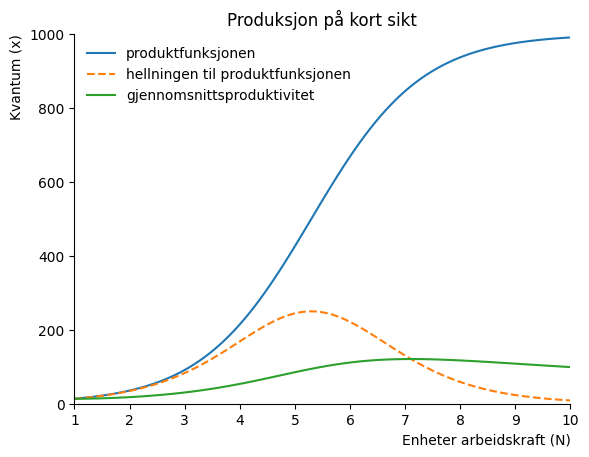

In [4]:
def production(N, A):
    return 1000 * (sp.exp(N) / (A + sp.exp(N)))


def production_derivative(N, A):
    return sp.diff(production(N, A), N)

def gjennomsnittlig_produksjon(N, A):
    return (production(N, A)/N)


production_func = sp.lambdify((N, A), production(N, A))
production_derivative_func = sp.lambdify((N, A), production_derivative(N, A))
gjennom_func = sp.lambdify((N, A), gjennomsnittlig_produksjon(N, A))

n=np.linspace(1,10,100)

fig1, ax = plt.subplots()
ax.set_ylabel('Kvantum (x)', loc='top')
ax.set_xlabel('Enheter arbeidskraft (N)', loc='right')
ax.set(xlim=(1,10))
ax.set(ylim=(0,1000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_title('Produksjon på kort sikt')

derivative_values = production_derivative_func(n, 200)
ax.plot(n, production_func(n, 200), '-', label='produktfunksjonen')
ax.plot(n, derivative_values, '--', label='hellningen til produktfunksjonen')
ax.plot(n, gjennom_func(n, 200), '-', label='gjennomsnittsproduktivitet')
ax.legend(loc='best',frameon=False);

In [30]:
maximum = production_derivative_func(n, 200).max()

max_N = np.argmax(production_derivative_func(n, 200))
snitt = n[max_N]

print(f'maksimale N verdien er {snitt}')
print(f'helliningspunktet er {maximum}')

maksimale N verdien er 5.2727272727272725
helliningspunktet er 249.9590761602292



I figuren ser vi produsjon på kort sikt. På x aksen ser vi kvantum og på y aksen er det arbeidskraft.